In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Eduonix/Machine learning/ML Project/AutoInsurance.csv')
dataset.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

# Initail Observations


*   The dataset contains 9134 rows and 24 columns.
*   No missing values were found.
*   The target variable is "Customer Lifetime Value" and is in float datatype.
*   There are categorical features like State, Response, Coverage, etc.
*   Numerical features include Income, Monthly Premium Auto, Total Claim Amount, etc.
*   The column "Effective To Date" is in date format but appears in a string datatype.

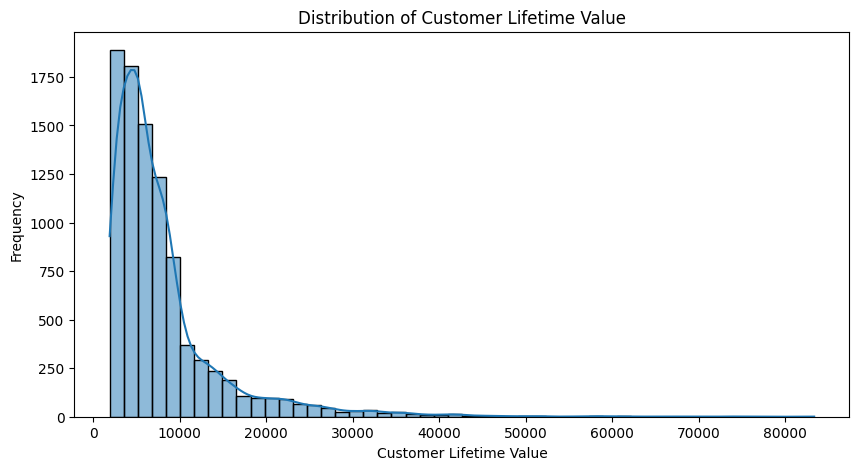

In [4]:
# Let’s first analyze the distribution of Customer Lifetime Value (CLV) and other key variables.

# Plot distribution of CLV
plt.figure(figsize=(10,5))
sns.histplot(dataset["Customer Lifetime Value"], bins=50, kde=True)
plt.title("Distribution of Customer Lifetime Value")
plt.xlabel("Customer Lifetime Value")
plt.ylabel("Frequency")
plt.show()

The Customer Lifetime Value(CLV) distribution is right-skewed, meaning most customers have a lower CLV, but a few have significantly higher values.

In [5]:
#Applying log transformation to CLV to normalize the distribution.
dataset["Log_CLV"] = np.log(dataset["Customer Lifetime Value"])

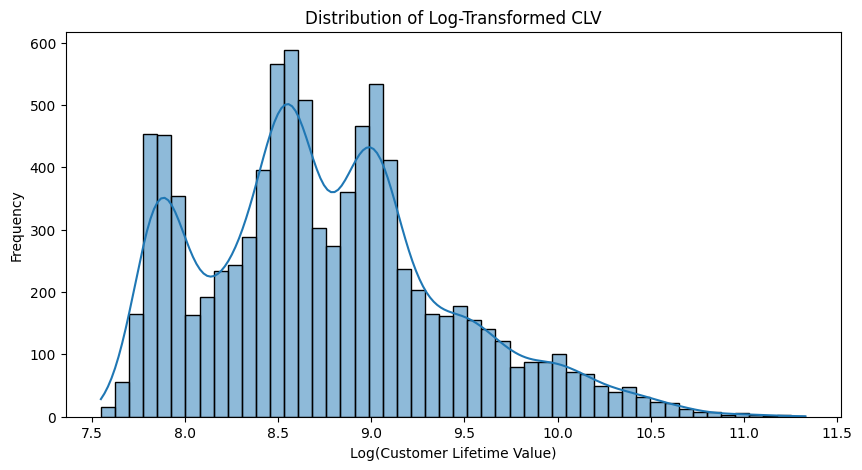

In [6]:
# Plot distribution after log transformation
plt.figure(figsize=(10, 5))
sns.histplot(dataset["Log_CLV"], bins=50, kde=True)
plt.title("Distribution of Log-Transformed CLV")
plt.xlabel("Log(Customer Lifetime Value)")
plt.ylabel("Frequency")
plt.show()

The log transformation has normalized the CLV distribution.

In [7]:
#Checking Correlation with numerical features
numerical_cols = dataset.select_dtypes(include=["number"])
correlation_matrix = numerical_cols.corr()
correlation_matrix["Customer Lifetime Value"].sort_values(ascending=False)

,Customer Lifetime Value
Customer Lifetime Value,1.000000
Log_CLV,0.896763
Monthly Premium Auto,0.396262
Total Claim Amount,0.226451
Income,0.024366
Number of Policies,0.021955
Months Since Last Claim,0.011517
Months Since Policy Inception,0.009418
Number of Open Complaints,-0.036343


The strongest numerical correlations with CLV are:

*  Monthly Premium Auto (0.396)
*  Total Claim Amount (0.226)
*  Income (0.024)
*  Number of Policies (0.0219)



In [8]:
# Covert categorical columns in list
categorical_cols = dataset.select_dtypes(include=["object"]).columns.tolist()

# Exclude 'Customer' column as it like a unique ID
categorical_cols.remove("Customer")

# Display unique value counts for categorical columns
cat_summary = {col: dataset[col].nunique() for col in categorical_cols}
cat_summary

{'State': 5,
 'Response': 2,
 'Coverage': 3,
 'Education': 5,
 'Effective To Date': 59,
 'EmploymentStatus': 5,
 'Gender': 2,
 'Location Code': 3,
 'Marital Status': 3,
 'Policy Type': 3,
 'Policy': 9,
 'Renew Offer Type': 4,
 'Sales Channel': 4,
 'Vehicle Class': 6,
 'Vehicle Size': 3}

# Observations on Categorical Features:
*  Response and Gender columns can be encoded as 0 and 1.
*  State, Coverage, Education, EmploymentStatus, Location Code, Marital Status, Policy Type, Renew Offer Type, Sales Channel and Vehicle Size columns can use label encoding.
*  Policy and Vehicle Class columns can use one-hot encoding.
*  Effective To Date column should be converted to datetime and extract meaningful features like month.

In [9]:
# Convert date column to datetime and extract the month
dataset["Effective To Date"] = pd.to_datetime(dataset["Effective To Date"])
dataset["Month"] = dataset["Effective To Date"].dt.month
dataset

<ipython-input-9-eb428cf540ae>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset["Effective To Date"] = pd.to_datetime(dataset["Effective To Date"])


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Log_CLV,Month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,7.924260,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,8.850738,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,9.464008,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,8.941920,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-03-02,Employed,M,43836,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,7.942253,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-10-02,Employed,M,71941,...,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,10.060747,10
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-12-02,Employed,F,21604,...,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,8.038031,12
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-06-02,Unemployed,M,0,...,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,9.007476,6
9132,UP19263,California,7524.442436,No,Extended,College,2011-03-02,Employed,M,21941,...,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,8.925912,3


In [10]:
# Drop original date column
dataset.drop(columns=["Effective To Date"], inplace=True)
dataset.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Log_CLV,Month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,7.924260,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,8.850738,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,9.464008,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,8.941920,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,7.942253,3


In [11]:
# Binary encoding for Gender and Response
dataset["Gender"] = dataset["Gender"].map({"M": 0, "F": 1})
dataset["Response"] = dataset["Response"].map({"No": 0, "Yes": 1})
dataset.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Log_CLV,Month
0,BU79786,Washington,2763.519279,0,Basic,Bachelor,Employed,1,56274,Suburban,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,7.924260,2
1,QZ44356,Arizona,6979.535903,0,Extended,Bachelor,Unemployed,1,0,Suburban,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,8.850738,1
2,AI49188,Nevada,12887.431650,0,Premium,Bachelor,Employed,1,48767,Suburban,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,9.464008,2
3,WW63253,California,7645.861827,0,Basic,Bachelor,Unemployed,0,0,Suburban,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,8.941920,1
4,HB64268,Washington,2813.692575,0,Basic,Bachelor,Employed,0,43836,Rural,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,7.942253,3


In [12]:
# Label Encoding for small categorical variables
from sklearn.preprocessing import LabelEncoder
label_enc_cols = ["State", "Coverage", "Education", "EmploymentStatus", "Location Code",
                  "Marital Status", "Policy Type", "Renew Offer Type", "Sales Channel", "Vehicle Size"]

le = LabelEncoder()
for col in label_enc_cols:
    dataset[col] = le.fit_transform(dataset[col])
dataset

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Log_CLV,Month
0,BU79786,4,2763.519279,0,0,0,1,1,56274,1,...,1,0,Corporate L3,0,0,384.811147,Two-Door Car,1,7.924260,2
1,QZ44356,0,6979.535903,0,1,0,4,1,0,1,...,8,1,Personal L3,2,0,1131.464935,Four-Door Car,1,8.850738,1
2,AI49188,2,12887.431650,0,2,0,1,1,48767,1,...,2,1,Personal L3,0,0,566.472247,Two-Door Car,1,9.464008,2
3,WW63253,1,7645.861827,0,0,0,4,0,0,1,...,7,0,Corporate L2,0,2,529.881344,SUV,1,8.941920,1
4,HB64268,4,2813.692575,0,0,0,1,0,43836,0,...,1,1,Personal L1,0,0,138.130879,Four-Door Car,1,7.942253,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,1,23405.987980,0,0,0,1,0,71941,2,...,2,1,Personal L1,1,3,198.234764,Four-Door Car,1,10.060747,10
9130,PK87824,1,3096.511217,1,1,1,1,1,21604,1,...,1,0,Corporate L3,0,1,379.200000,Four-Door Car,1,8.038031,12
9131,TD14365,1,8163.890428,0,1,0,4,0,0,1,...,2,0,Corporate L2,0,1,790.784983,Four-Door Car,1,9.007476,6
9132,UP19263,1,7524.442436,0,1,1,1,0,21941,1,...,3,1,Personal L2,2,1,691.200000,Four-Door Car,0,8.925912,3


In [13]:
# One-hot encoding for high-cardinality categorical variables
dataset = pd.get_dummies(dataset, columns=["Policy", "Vehicle Class"], drop_first=True)
dataset.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,...,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car
0,BU79786,4,2763.519279,0,0,0,1,1,56274,1,...,False,False,False,False,False,False,False,False,False,True
1,QZ44356,0,6979.535903,0,1,0,4,1,0,1,...,False,True,False,False,False,False,False,False,False,False
2,AI49188,2,12887.431650,0,2,0,1,1,48767,1,...,False,True,False,False,False,False,False,False,False,True
3,WW63253,1,7645.861827,0,0,0,4,0,0,1,...,False,False,False,False,False,False,False,True,False,False
4,HB64268,4,2813.692575,0,0,0,1,0,43836,0,...,False,False,False,False,False,False,False,False,False,False


In [14]:
# Convert only boolean columns to integer
for col in dataset.select_dtypes(include=["bool"]).columns:
    dataset[col] = dataset[col].astype(int)
dataset.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,...,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car
0,BU79786,4,2763.519279,0,0,0,1,1,56274,1,...,0,0,0,0,0,0,0,0,0,1
1,QZ44356,0,6979.535903,0,1,0,4,1,0,1,...,0,1,0,0,0,0,0,0,0,0
2,AI49188,2,12887.431650,0,2,0,1,1,48767,1,...,0,1,0,0,0,0,0,0,0,1
3,WW63253,1,7645.861827,0,0,0,4,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,HB64268,4,2813.692575,0,0,0,1,0,43836,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#scaling numerical features before training the model.
from sklearn.preprocessing import MinMaxScaler

# List of numerical columns to scale
num_cols = ["Income", "Monthly Premium Auto", "Months Since Last Claim",
            "Months Since Policy Inception", "Number of Open Complaints",
            "Number of Policies", "Total Claim Amount"]

scaler = MinMaxScaler()
dataset[num_cols] = scaler.fit_transform(dataset[num_cols])

dataset.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,...,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car
0,BU79786,4,2763.519279,0,0,0,1,1,0.562847,1,...,0,0,0,0,0,0,0,0,0,1
1,QZ44356,0,6979.535903,0,1,0,4,1,0.000000,1,...,0,1,0,0,0,0,0,0,0,0
2,AI49188,2,12887.431650,0,2,0,1,1,0.487763,1,...,0,1,0,0,0,0,0,0,0,1
3,WW63253,1,7645.861827,0,0,0,4,0,0.000000,1,...,0,0,0,0,0,0,0,1,0,0
4,HB64268,4,2813.692575,0,0,0,1,0,0.438443,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Drop Customer ID column as it is not useful for prediction
dataset.drop(columns=["Customer"], inplace=True)

In [17]:
#Spliting the data into Traing data and Testing data
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
x = dataset.drop(columns=["Customer Lifetime Value", "Log_CLV"])
y = dataset["Log_CLV"]  # Using log-transformed CLV as target

# Spliting data into training (80%) and testing (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Checking dataset shapes
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7307, 33), (1827, 33), (7307,), (1827,))

In [18]:
# Training model using Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [19]:
# Predict on test set
y_pred = lr.predict(x_test)

In [20]:
# Performance Evaluation
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.2574894506653451

In [21]:
#Training the Model using Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [22]:
# Predict on test set
y_pred = dt.predict(x_test)

In [23]:
# Performance Evaluation
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8340809461185141

Will try other algorithms to find best algorithm to go with

In [24]:
# Training model using Random Forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [25]:
# Predict on test set
y_pred = rf.predict(x_test)

In [26]:
# Performance Evaluation
r2_score(y_test, y_pred)

0.9130219591185346

R2 score for Random Forest is good, still trying other algorithms to check if the performance will imrove or not

In [27]:
# Training model using Bagging
from sklearn.ensemble import BaggingRegressor

bg = BaggingRegressor()
bg.fit(x_train, y_train)

BaggingRegressor()

In [28]:
# Predict on test set
y_pred = bg.predict(x_test)

In [29]:
# Performance Evaluation
r2_score(y_test, y_pred)

0.906497951750316

In [30]:
# Training model using AdaBoost
from sklearn.ensemble import AdaBoostRegressor

ab = AdaBoostRegressor()
ab.fit(x_train, y_train)

AdaBoostRegressor()

In [31]:
# Predict on test set
y_pred = ab.predict(x_test)

In [32]:
# Performance Evaluation
r2_score(y_test, y_pred)

0.8460452984448095

In [33]:
# Training model using Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)

GradientBoostingRegressor()

In [34]:
# Predict on test set
y_pred = gb.predict(x_test)

In [35]:
# Performance Evaluation
r2_score(y_test, y_pred)

0.9044264345307927

In [36]:
# Training model using eXtreme Gradient Boosting
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [37]:
# Predict on test set
y_pred = xgb.predict(x_test)

In [38]:
# Performance Evaluation
r2_score(y_test, y_pred)

0.9007695742555547

In [39]:
# Training model again using Random Forest by adding different parameters

rf = RandomForestRegressor(n_estimators=100, criterion="friedman_mse", random_state=42)
rf.fit(x_train, y_train)

# Predict on test set
y_pred = rf.predict(x_test)

# Performance Evaluation
r2_score(y_test, y_pred)

0.913028401653963

# Conclusion

*  The Random Forest model is highly effective for predicting CLV.
*  The model is now ready for deployment or further optimization with advanced tuning.

